                            Iris Flower Classification using machine learning

The data used here is from the UCI repository https://archive.ics.uci.edu/ml/datasets/iris

Sources:

     (a) Creator: R.A. Fisher
     (b) Donor: Michael Marshall (MARSHALL%PLU@io.arc.nasa.gov)
     (c) Date: July, 1988

Data Set Information:

This is perhaps the best known database to be found in the pattern recognition literature. 
Fisher's paper is a classic in the field and is referenced frequently to this day. 
(See Duda & Hart, for example.) The data set contains 3 classes of 50 instances each, where each class refers to a type of iris plant. One class is linearly separable from the other 2; the latter are NOT linearly separable from each other.

Predicted attribute: class of iris plant.

This is an exceedingly simple domain.

This data differs from the data presented in Fishers article (identified by Steve Chadwick, 
                                                              spchadwick '@' espeedaz.net ). 
The 35th sample should be: 4.9,3.1,1.5,0.2,"Iris-setosa" where the error is in the fourth feature. 
The 38th sample: 4.9,3.6,1.4,0.1,"Iris-setosa" where the errors are in the second and third features. 

This is a very basic and popular machine learning project.



## Stage 1:

### About the data

The dataset contains three classes of flowers: 
- Iris Setosa
- Iris Versicolour
- Iris Virginica

and each class contains four features:
- sepal length in cm
- sepal width in cm
- petal length in cm
- petal width in cm

### Load the data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [50]:
columns = ['sepallength', 'sepal_width', 'petal_length', 'petal_width', 'classes']
data = pd.read_csv('iris.data', names=columns)
iris_data = data.copy() # make a deep copy to avoid bad manipulation of the original data

## Stage 2:

### Get to know the data

Let's see some basical statistics of our data

In [9]:
iris_data.describe()

,sepallength,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


Let's check if there are null values in our data

In [10]:
iris_data.isnull().sum()

sepallength     0
sepal_width     0
petal_length    0
petal_width     0
classes         0
dtype: int64

In [11]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepallength   150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   classes       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


We can see that our data contains 150 rows with non-null float64 (4 columns) and non-null object (1 column)

Now let's visualize the whole dataset.

With the help of seaborn we can do this.

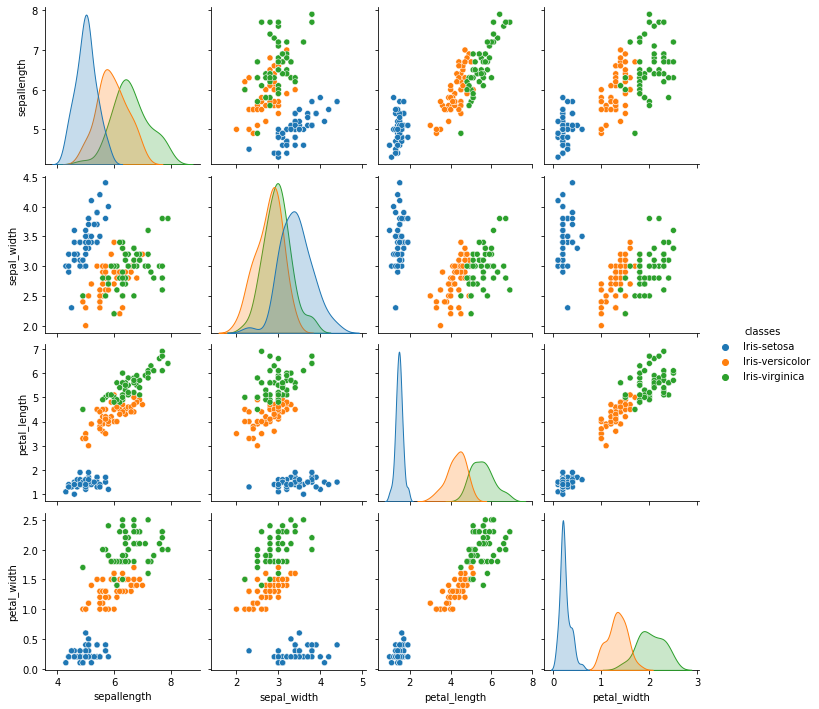

In [12]:
sns.pairplot(iris_data, hue='classes')

- From these diagrams, we can see that iris setosa is well separated from the two others which are in some cases confused.

Text(0.5, 0, 'Classes')

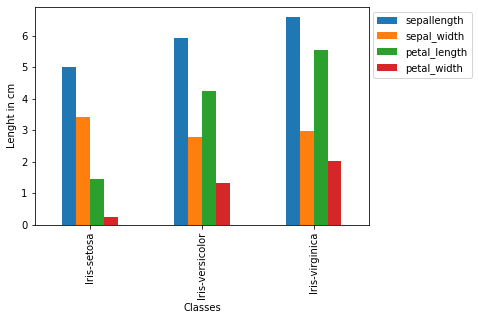

In [36]:
iris_data.groupby('classes').mean().plot(kind='bar')
plt.legend(bbox_to_anchor=(1.32,1))
plt.ylabel('Lenght in cm')
plt.xlabel('Classes')

From this plot, we see that iris-virginica is the longest flower and iris-setosa is the shortest

## Stage 3:

### Preparing our data

For our classes, we have strings so we have to convert it into numbers because our computer well understand number than strings.

We can do the conversion using a Labelencoder which is already implemented in sklearn

In [52]:
from sklearn.preprocessing import LabelEncoder

In [53]:
le = LabelEncoder()
for i in range(len(iris_data['classes'])):
    iris_data['classes'] = le.fit_transform(iris_data['classes'])

In [54]:
iris_data

,sepallength,sepal_width,petal_length,petal_width,classes
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now, if we take a look in our data the classes are now 0,1 and 2 which represent respectively Iris-setosa, Iris-versicolor and Iris-virginica

##### Split our data

Our features will be all columns except for the classes which will be our target

Get our features and target name

In [55]:
features_name = iris_data.columns[:-1]
target_name = iris_data.columns[-1]

Get our features and target data

In [56]:
features = iris_data[features_name]
target = iris_data[target_name]

Now let's organize our data into training data and test data

In [57]:
from sklearn.model_selection import train_test_split

We will get 20% of the original data to be our test data

In [58]:
train, test, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=2)

Our data is ready, so now we can build model

## Stage 4:

### Build models

First, we will use the `support vector classifier` or `SVC`

We can import it directly from sklearn

In [59]:
from sklearn.svm import SVC

create the SVC classifier

In [60]:
svm = SVC()

Train the classifier

In [62]:
svm.fit(train, train_target)

SVC()

Make prediction

In [64]:
pred_svm = svm.predict(test)

Now, we are going to use the kNN classifier

In [79]:
from sklearn.neighbors import KNeighborsClassifier

Create the kNN classifier

In [74]:
knn = KNeighborsClassifier(n_neighbors=1)

Train our model

In [75]:
knn.fit(train, train_target)

KNeighborsClassifier(n_neighbors=1)

Make a prediction

In [76]:
pred_knn = knn.predict(test)

## Stage 5:

### Evaluating each model

Find the accuracy of each model by using the accuracy_score from sklearn

In [80]:
from sklearn.metrics import accuracy_score

Precentage of the accuracy for the SVC model

In [81]:
accuracy_score(test_target, pred_svm)

0.9666666666666667

Precentage of the accuracy for the kNN model

In [82]:
accuracy_score(test_target, pred_knn)

1.0

But we can see detailed classification report of each model

In [85]:
from sklearn.metrics import classification_report

- SVC model

In [86]:
print(classification_report(test_target, pred_svm))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      0.88      0.93         8
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



- kNN model

In [87]:
print(classification_report(test_target, pred_knn))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         8
           2       1.00      1.00      1.00         8

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



We can tell here that the kNN algorithm perform well than the SVC in this dataset